In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import tensorflow as tf
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\John Carlo\Documents\Datasets\Test Scores Dataset\archive\stud_perf_exam.csv")

Initial Look at the Dataset

In [4]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [8]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Data Visualization

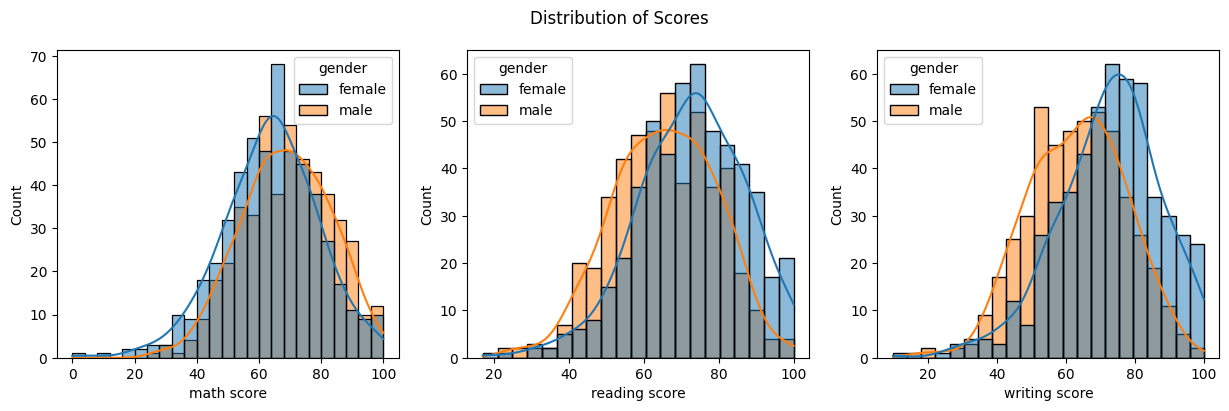

In [9]:
fig, axs = plt.subplots(1,3, figsize = (15,4))
subjects = ['math score', 'reading score', 'writing score']
for subject, pos in zip(subjects, range(0,3)):
    sns.histplot(data=df, x = subject, hue='gender', kde = True,ax=axs[int(pos)])
plt.suptitle('Distribution of Scores')
plt.show()


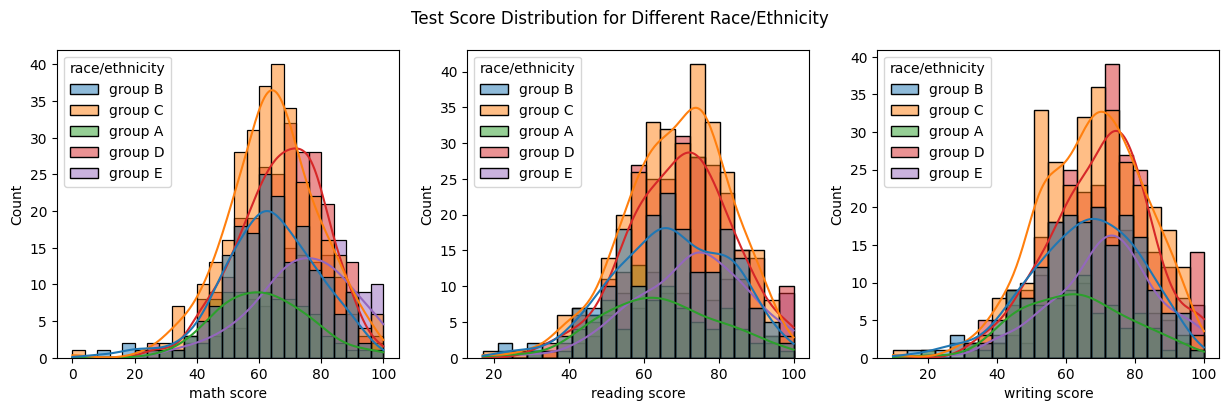

In [10]:
fig, axs = plt.subplots(1,3, figsize=(15,4))
subjects = ['math score', 'reading score', 'writing score']
for subject, y in zip(subjects, range(0,3)):
    sns.histplot(data=df, x = subject, hue='race/ethnicity', kde= True, ax=axs[y])
plt.suptitle('Test Score Distribution for Different Race/Ethnicity')
plt.show()

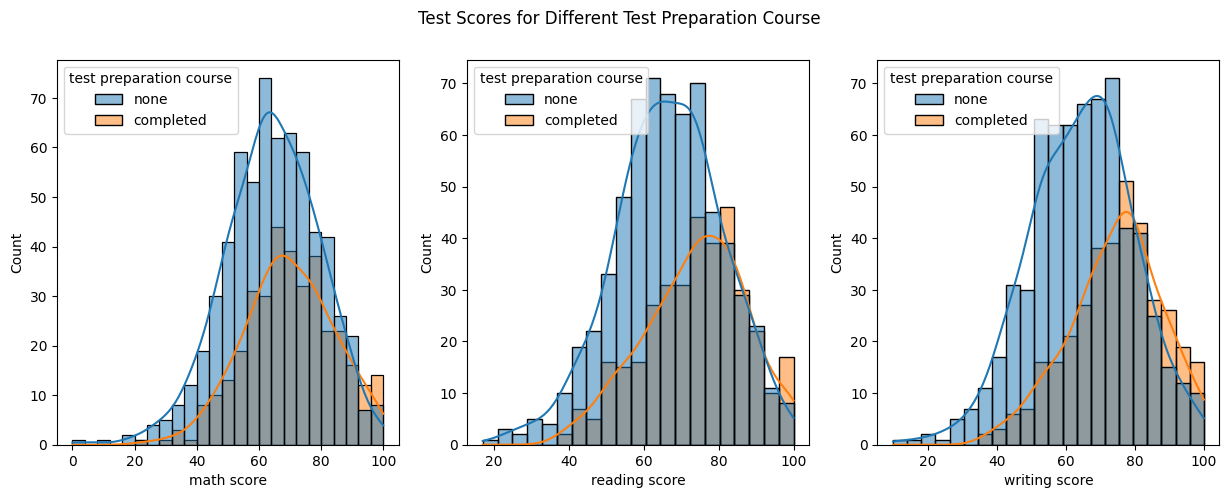

In [11]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
for subject, x in zip(subjects, range(0,3)):
    sns.histplot(data=df, x = subject, hue='test preparation course', kde=True, ax=axs[x])
plt.suptitle('Test Scores for Different Test Preparation Course')
plt.show()

Data Preprocessing

In [ ]:
df['mean score'] = (df['math score'] + df['writing score'] + df['reading score'])/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [ ]:
#make a copy of the df first so that we can go back to the original dataset in case we inadvertently change something in the data

df_copy = df.copy()
df_copy.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [ ]:
#separate the labels from the features
#in this case we have the scores as separate labels

y_mean = df_copy['mean score']
y_math = df_copy['math score']
y_reading = df_copy['reading score']
y_writing = df_copy['writing score']
X = df_copy.drop(['mean score', 'math score', 'writing score', 'reading score'], axis = 'columns')

Model for predicting Mean Scores

In [ ]:
#divide the dataset into training and validation subsets

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y_mean, train_size = 0.8, random_state = 0)

In [ ]:
#separate the numerical and categorical data
#in this case we dont have any numerical data but we can just create a  preprocessing function for it just in case the dataset gets
#updated with a numerical column for our features

num_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]
cat_cols = [cname for cname in X_train.columns if X_train[cname].dtype == 'object']

In [ ]:
#Preprocessing the data using pipeline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#preprocessor for the numerical data
num_trans = SimpleImputer(strategy='mean')

#preprocessor for the categorical data

cat_trans = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore') )
])

#combining both preprocessor

preprocessor = ColumnTransformer(transformers=[
    ('num', num_trans, num_cols),
    ('cat', cat_trans, cat_cols)
])

In [ ]:
#models to be tested

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

lin_mod = LinearRegression()
rf_mod = RandomForestRegressor(random_state=0)
tree_mod = DecisionTreeRegressor()
svr_lin = SVR(kernel='linear')
svr_poly = SVR(kernel='poly')
svr_rbf = SVR(kernel='rbf')

models = [lin_mod, rf_mod, tree_mod, svr_lin, svr_poly, svr_rbf]

In [ ]:
#create a function that fits the data to the model selected and creates a prediction

def model_performace(X_train, X_valid, y_train, y_valid, model):
    from sklearn.metrics import mean_absolute_error
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)

    pred = pipeline.predict(X_valid)

    score = mean_absolute_error(pred, y_valid)
    return score
    

In [ ]:
#run the model performance function for the models listed

for model in models:
    model_performace(X_train, X_valid, y_train, y_valid, model)

In [ ]:
#The random forest regressor did not perform well but its performance can still be improved
#through randomizedsearchcv

from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_grid = [
    {'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 100, num=50)],
     'max_features': [int(x) for x in np.linspace(start = 2, stop= 20, num=10)],
     'max_depth': [int(x) for x in np.linspace(start=1, stop=10, num=10)],
     'bootstrap': [True, False]}
]

rand_gridsearch = RandomizedSearchCV(rf_mod, param_distributions= param_grid, cv = 5, 
                                     scoring= 'neg_mean_squared_error',
                                     return_train_score=True)

X_train_prep = preprocessor.fit_transform(X_train)

rand_gridsearch.fit(X_train_prep, y_train)

rand_gridsearch.best_params_


{'n_estimators': 55, 'max_features': 2, 'max_depth': 5, 'bootstrap': False}

In [ ]:
rf_mod = rand_gridsearch.best_estimator_

models = [lin_mod, rf_mod, tree_mod, svr_lin, svr_poly, svr_rbf]

model_scores = {}
for model in models:
    score = model_performace(X_train, X_valid, y_train, y_valid, model)
    model_scores[model] = score
model_scores

{LinearRegression(): 10.447421856785823,
 RandomForestRegressor(bootstrap=False, max_depth=5, max_features=2,
                       n_estimators=55, random_state=0): 10.47633374569579,
 DecisionTreeRegressor(): 12.257116861352156,
 SVR(kernel='linear'): 10.356401538104825,
 SVR(kernel='poly'): 10.45312129172149,
 SVR(): 10.376890485534409}

In [ ]:
# the performance we have obtained above for the rf model is mow closer to that of the
#linear model, but this is still not good since the standard deviation of the
#grades is about 15 so the predicting ability of our models is very limited.
#This could be mainly due to the available features that we have used to create the model.
#Better and more profound set of features can greatly imporve the performance of the model.

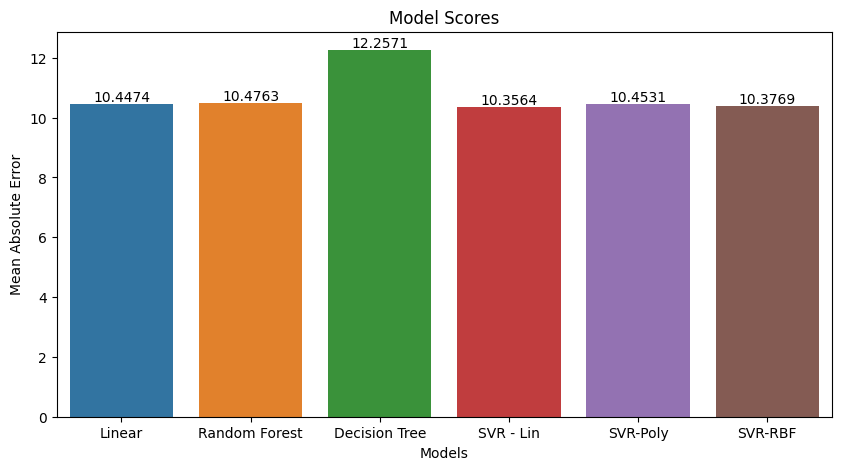

In [ ]:
#Make a graph to visually compare the performace of each model

fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(x  = ['Linear', 'Random Forest', 'Decision Tree', 'SVR - Lin', 
                  'SVR-Poly', 'SVR-RBF'], y = [float(score) for score in model_scores.values()])
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.title('Model Scores')

for i in ax.containers:
    ax.bar_label(i,)

plt.show()
